In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from lets_plot import *

LetsPlot.setup_html()

In [2]:
nfl = pd.read_csv("data/nfl.csv")
teams = pd.read_csv("data/teams.csv")

In [3]:
nfl[nfl["team"] == "Chicago Bears"]

,team,week,wins,losses,differential
570,Chicago Bears,0,0,0,0
571,Chicago Bears,1,0,1,-1
572,Chicago Bears,2,0,2,-2
573,Chicago Bears,3,0,3,-3
574,Chicago Bears,4,0,4,-4
575,Chicago Bears,5,1,4,-3
576,Chicago Bears,6,1,5,-4
577,Chicago Bears,7,2,5,-3
578,Chicago Bears,8,2,6,-4
579,Chicago Bears,9,2,7,-5


In [4]:
teams

,abbreviation,full_name,conference,division
0,BUF,Buffalo Bills,AFC,East
1,MIA,Miami Dolphins,AFC,East
2,NYJ,New York Jets,AFC,East
3,NE,New England Patriots,AFC,East
4,BAL,Baltimore Ravens,AFC,North
5,CLE,Cleveland Browns,AFC,North
6,PIT,Pittsburgh Steelers,AFC,North
7,CIN,Cincinnati Bengals,AFC,North
8,HOU,Houston Texans,AFC,South
9,JAX,Jacksonville Jaguars,AFC,South


In [5]:
nfl = nfl.merge(teams, how="left", left_on="team", right_on="full_name")
nfl.drop(["abbreviation", "full_name"], axis=1, inplace=True)

In [6]:
nfl

,team,week,wins,losses,differential,conference,division
0,Detroit Lions,0,0,0,0,NFC,North
1,Detroit Lions,1,1,0,1,NFC,North
2,Detroit Lions,2,1,1,0,NFC,North
3,Detroit Lions,3,2,1,1,NFC,North
4,Detroit Lions,4,3,1,2,NFC,North
...,...,...,...,...,...,...,...
603,Carolina Panthers,14,1,12,-11,NFC,South
604,Carolina Panthers,15,2,12,-10,NFC,South
605,Carolina Panthers,16,2,13,-11,NFC,South
606,Carolina Panthers,17,2,14,-12,NFC,South


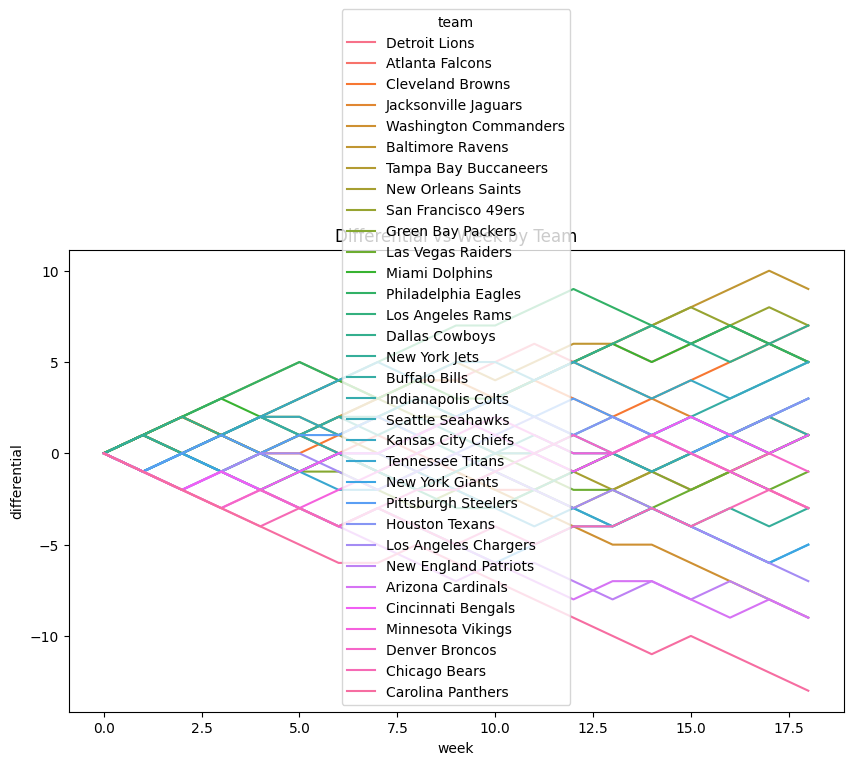

In [7]:
# plot data with seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x="week", y="differential", hue="team", data=nfl)
plt.title("Differential vs Week by Team")
plt.show()

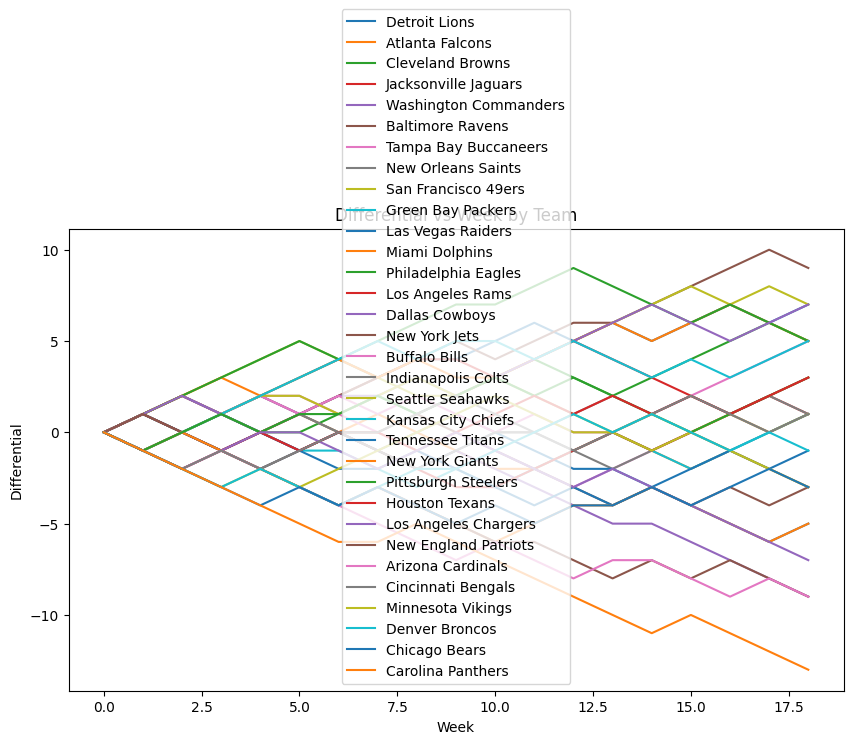

In [8]:
# plot data with matplotlib
fig, ax = plt.subplots(figsize=(10, 6))
teams = nfl["team"].unique()
for team in teams:
    team_data = nfl[nfl["team"] == team]
    ax.plot(team_data["week"], team_data["differential"], label=team)
ax.set_title("Differential vs Week by Team")
ax.set_xlabel("Week")
ax.set_ylabel("Differential")
ax.legend()
plt.show()

In [9]:
nfl

,team,week,wins,losses,differential,conference,division
0,Detroit Lions,0,0,0,0,NFC,North
1,Detroit Lions,1,1,0,1,NFC,North
2,Detroit Lions,2,1,1,0,NFC,North
3,Detroit Lions,3,2,1,1,NFC,North
4,Detroit Lions,4,3,1,2,NFC,North
...,...,...,...,...,...,...,...
603,Carolina Panthers,14,1,12,-11,NFC,South
604,Carolina Panthers,15,2,12,-10,NFC,South
605,Carolina Panthers,16,2,13,-11,NFC,South
606,Carolina Panthers,17,2,14,-12,NFC,South


In [10]:
nfc = nfl[nfl["conference"] == "NFC"]
nfc_east = nfc[nfc["division"] == "East"]

(
    ggplot(nfc_east, aes(x="week", y="differential", color="team"))
    + geom_path(
        tooltips=layer_tooltips().line("Team: @team").line("Record: @wins - @losses")
    )  # Add this line  # And this line
    + ggsize(width=1400, height=700)
)